# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.


Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

**No hace falta escribir código para responder estas preguntas.**

## Respuestas:

### 1. ¿De qué se trata el conjunto de datos?

El conjunto de datos corresponde a solicitudes de líneas de crédito sobre la vivienda (home equity loans) y el desempeño de esos préstamos. Está basado en el set de datos de "Kaggle Home Equity". Contiene información de clientes recientes de un banco, con el objetivo de analizar y automatizar la decisión de aprobación o rechazo de futuros préstamos, minimizando el riesgo para la entidad crediticia.


### 2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?

La variable objetivo es la columna llamada `TARGET` (en algunos lados aparece como `BAD`).

Valor 1: El cliente incumplió el pago del préstamo (mora o atraso grave).

Valor 0: El préstamo fue reembolsado normalmente.

El objetivo es predecir si un nuevo solicitante va a incumplir o no el pago del préstamo, usando la información disponible.

### 3. ¿Qué información (atributos) hay disponible para hacer la predicción?

Hay disponible 12 variables o atributos:

* `LOAN:`   	Monto solicitado en el préstamo
* `MORTDUE:` 	Monto de hipoteca vigente
* `VALUE:`  	Valor de la propiedad
* `YOJ:`    	Años en el empleo actual
* `DEROG:`  	Cantidad de reportes negativos importantes
* `DELINQ:` 	Cantidad de líneas de crédito en mora
* `CLAGE:`  	Antigüedad de la línea de crédito más vieja (meses)
* `NINQ:`   	Cantidad de líneas de crédito abiertas recientemente
* `CLNO:`   	Cantidad total de líneas de crédito
*`DEBTINC:` 	Relación deuda/ingreso (%)

### 4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

- **DEBTINC**: Es un indicador directo de la capacidad de pago del solicitante. Una persona con mucha deuda en relación a sus ingresos tiene más riesgo de incumplir.

Cuanto más alto sea este ratio, más probable es que haya dificultad para cumplir con nuevas obligaciones.

- **DEROG**: La presencia de eventos crediticios graves (como bancarrota o juicios) es un fuerte indicador de riesgo histórico.

- **DELINQ**: Aunque menos grave que DEROG, refleja incumplimientos recientes o frecuentes, lo cual es útil para predecir problemas futuros.


## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

In [129]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("talk")

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier


In [130]:
#dataset = pd.read_csv("./data/loan_data.csv", comment="#")
dataset = pd.read_csv("https://raw.githubusercontent.com/DiploDatos/IntroduccionAprendizajeAutomatico/master/data/loan_data.csv", comment="#")


# # División entre instancias y etiquetas
# X, y = dataset.iloc[:, 1:], dataset.TARGET

# # división entre entrenamiento y evaluación
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [131]:
df = dataset.copy()
df

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,4700,88026.0,115506.0,6.0,0.0,0.0,182.248332,0.0,27.0,29.209023
1,0,19300,39926.0,101208.0,4.0,0.0,0.0,140.051638,0.0,14.0,31.545694
2,0,5700,71556.0,79538.0,2.0,0.0,0.0,92.643085,0.0,15.0,41.210012
3,0,13000,44875.0,57713.0,0.0,1.0,0.0,184.990324,1.0,12.0,28.602076
4,0,19300,72752.0,106084.0,11.0,0.0,0.0,193.707100,1.0,13.0,30.686106
...,...,...,...,...,...,...,...,...,...,...,...
1849,1,53400,228236.0,305514.0,6.0,0.0,0.0,11.148069,0.0,2.0,34.558417
1850,1,53600,235895.0,299772.0,5.0,0.0,0.0,112.748282,7.0,22.0,44.945929
1851,1,53600,208197.0,297280.0,4.0,1.0,1.0,160.485251,2.0,29.0,41.646731
1852,1,65500,205156.0,290239.0,2.0,0.0,0.0,98.808206,1.0,21.0,144.189001


In [132]:
# Cantidad de filas con al menos un valor nulo
num_rows_with_nan = df.isnull().any(axis=1).sum()

# Cantidad de datos faltantes por variable
missing_per_col = df.isnull().sum()

(num_rows_with_nan, missing_per_col)

(np.int64(0),
 TARGET     0
 LOAN       0
 MORTDUE    0
 VALUE      0
 YOJ        0
 DEROG      0
 DELINQ     0
 CLAGE      0
 NINQ       0
 CLNO       0
 DEBTINC    0
 dtype: int64)

###----------------------------------------------------------
No se observan valores faltantes en el dataset

###-------------------------------------------------------------

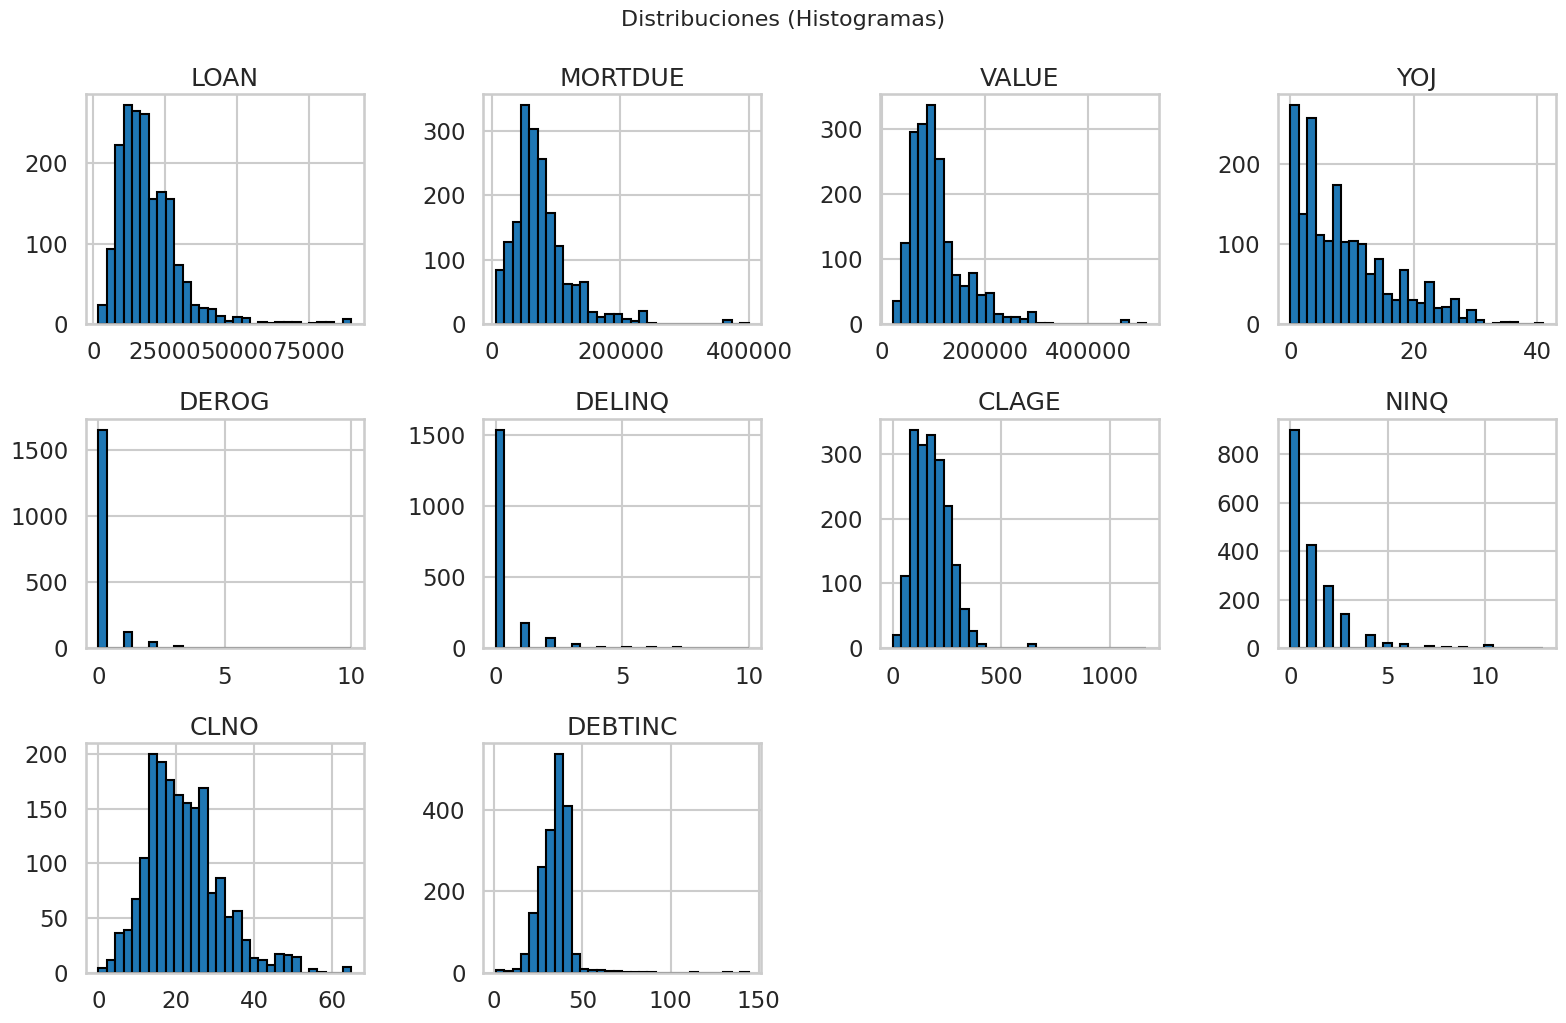

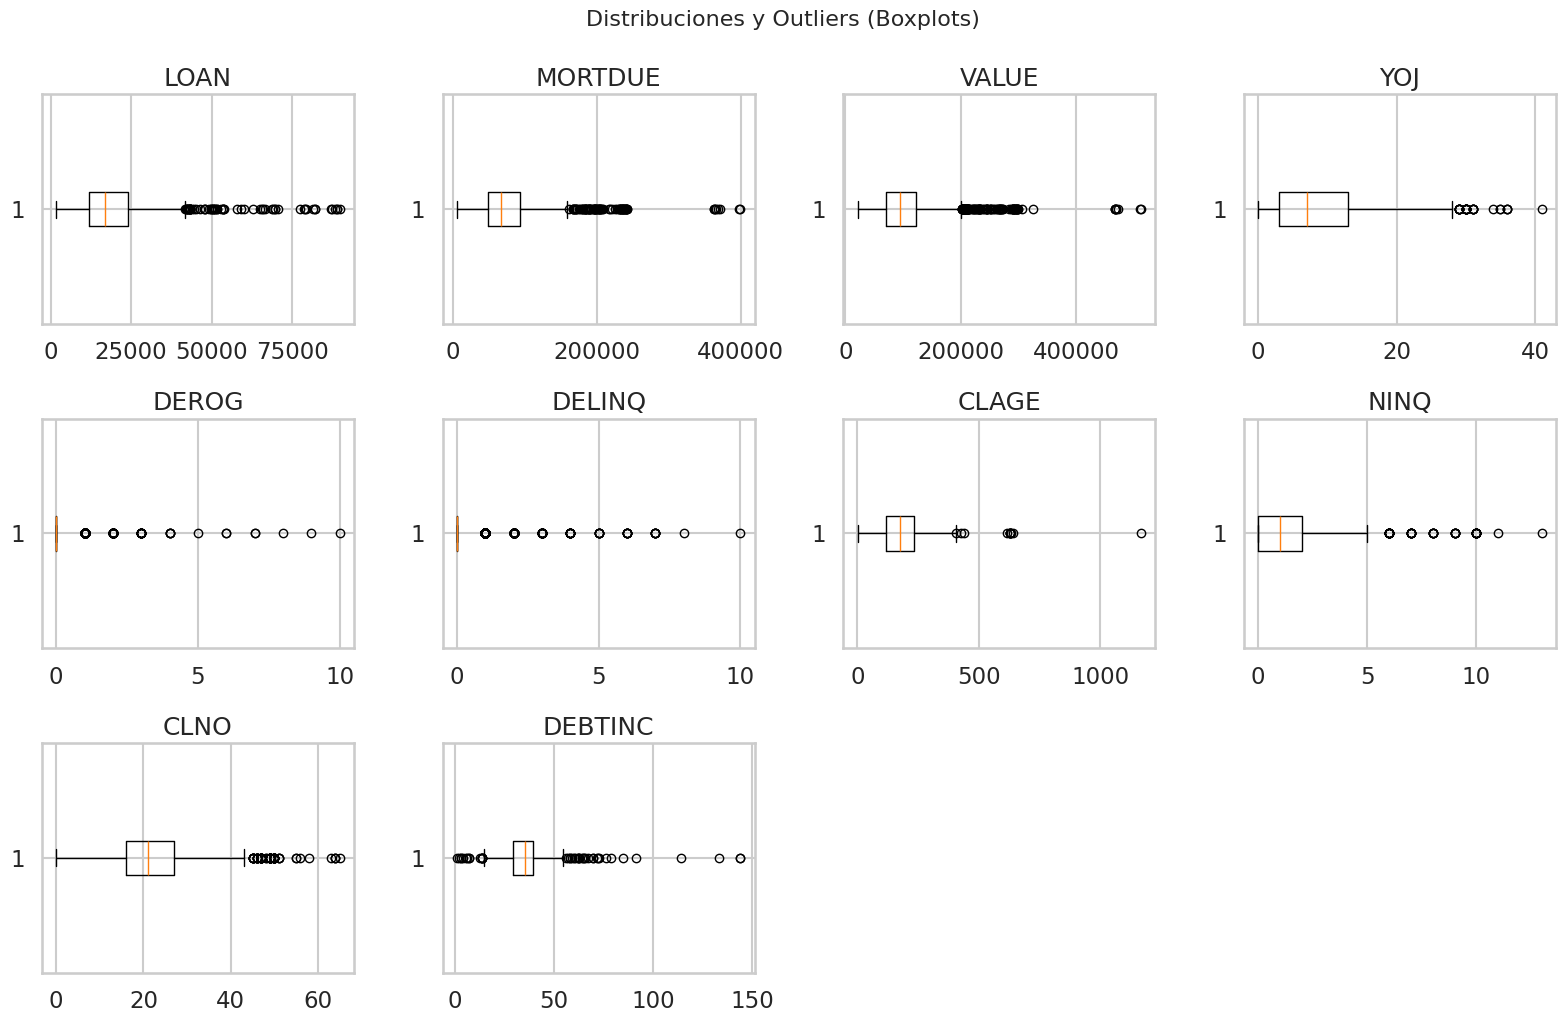

In [133]:

# Variables numéricas
numeric_cols = [col for col in df.columns if col != 'TARGET']

# Histograms
plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 4, i)
    plt.hist(df[col], bins=30, edgecolor='k')
    plt.title(col)
    plt.tight_layout()
plt.suptitle('Distribuciones (Histogramas)', y=1.03, fontsize=16)
plt.show()

# Boxplots
plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 4, i)
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(col)
    plt.tight_layout()
plt.suptitle('Distribuciones y Outliers (Boxplots)', y=1.03, fontsize=16)
plt.show()

Vemos que las features tienen escalas muy distintas, por lo que escalaremos los datos antes de entrenar los modelos, ya que el método de descenso de gradiente que usa SGDClassifier es sensible a la escala. 

In [134]:
X = df.drop('TARGET', axis=1)
y = df['TARGET']
#X = X.fillna(X.median()) Si hubiesen valores faltantes, lo ideal seria rellenar
#con valores de la mediana porque es robusta ante ouliers.


# Split en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Escalamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [135]:
# distribución de variable target en subconjuntos de train y test
print("Distribución original:", y.value_counts(normalize=True))
print("Train:", y_train.value_counts(normalize=True))
print("Test:", y_test.value_counts(normalize=True))

Distribución original: TARGET
0    0.833333
1    0.166667
Name: proportion, dtype: float64
Train: TARGET
0    0.836143
1    0.163857
Name: proportion, dtype: float64
Test: TARGET
0    0.822102
1    0.177898
Name: proportion, dtype: float64


Verificamos que los subconjuntos de train y test presentan distribuciones semejantes de la variable TARGET. 

In [136]:
# Entrenar SGDClassifier
clf = SGDClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

# Predicciones
y_train_pred = clf.predict(X_train_scaled)
y_test_pred = clf.predict(X_test_scaled)


In [137]:
# ============
# TRAIN
# ============
y_train_pred = clf.predict(X_train_scaled)
print("🔹 Evaluación en conjunto de ENTRENAMIENTO")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))
print("F1 Score:", f1_score(y_train, y_train_pred))
print("Matriz de confusión:\n", confusion_matrix(y_train, y_train_pred))

# ============
# TEST
# ============
y_test_pred = clf.predict(X_test_scaled)
print("\n🔹 Evaluación en conjunto de TEST")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_test_pred))

🔹 Evaluación en conjunto de ENTRENAMIENTO
Accuracy: 0.8570465273095077
Precision: 0.6099290780141844
Recall: 0.35390946502057613
F1 Score: 0.4479166666666667
Matriz de confusión:
 [[1185   55]
 [ 157   86]]

🔹 Evaluación en conjunto de TEST
Accuracy: 0.8571428571428571
Precision: 0.6444444444444445
Recall: 0.4393939393939394
F1 Score: 0.5225225225225225
Matriz de confusión:
 [[289  16]
 [ 37  29]]


#### Criterios para la interpretación

- Accuracy: proporción de predicciones correctas (puede ser engañoso en datasets con proporción de éxito/fracaso desbalanceada)

- Precision: de todos los positivos que predijo el modelo, ¿cuántos eran realmente positivos?

- Recall: de todos los positivos reales, ¿cuántos detectó el modelo?

- F1-score: media armónica entre precision y recall.

- Matriz de confusión: muestra TP, FP, TN, FN.

##### Matriz de confusión en contexto del problema
- FP: Se predijo mora cuando el solicitante pagó correctamente el crédito.
- FN: Se predijo cumplimiento cuando el solicitante incurrió en mora.
- TP: Se predijo mora y hubo mora.
- TN: Se predijo cumplimiento y hubo cumplimiento.

#### Interpretación

Usando los hiperparámetros por omisión, el modelo SGDClassifier logra un accuracy de aproximadamente 0.86 en ambos conjuntos. Aunque a primera vista parece alto, hay que tener presente que el dataset presenta un 20% de casos de mora (`target = 1`), por lo que un modelo que predijera `target = 0` para todos los casos tendría una accuracy de alrededor de 0.80. 

La capacidad del modelo para identificar incumplidores es baja: el recall es del 32% en el conjunto de test, indicando que el modelo no está detectando el 70% de los casos reales de mora. 

La precisión también es relativamente baja, alrededor del 70% en ambos subcojuntos de datos. Esto significa que de los casos en que el modelo predijo que iba a haber mora, el 30% fueron realmente casos de cumplimiento. Este no es un resultado alentador para la implementación de este modelo ya que indica una alta proporción de falsos positivos. 

El modelo predice casi siempre la clase mayoritaria (“no incumple”), mostrando que el accuracy puede ser engañoso en datasets desbalanceados.

EL F1-score es el indicador más integral y confiable, sobre todo en un conjunto de datos con clases desbalanceadas. Valores tan bajos de F1-score reflejan un modelo con rendimiento pobre para detectar los casos de mora.

#### Conclusión

El modelo es débil para tareas sensibles como evaluación crediticia. 

Se debe ajustar los hiperparámetros para mejorar la performance. 

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [138]:
# Métricas función
def metrics(y_true, y_pred):
    return {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred, zero_division=0),
        "recall": recall_score(y_true, y_pred, zero_division=0),
        "f1": f1_score(y_true, y_pred, zero_division=0),
        "confusion_matrix": confusion_matrix(y_true, y_pred)
    }

In [139]:
param_grid = {
    'loss': ['log_loss', 'hinge', 'modified_huber'], # función de costo
    'alpha': [0.0001, 0.001, 0.01],  # tasa de regularización
    'eta0': [0.001, 0.01, 0.1], # tasa de aprendizaje inicial
    'learning_rate': ['constant', 'optimal'] 
}

sgd = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)

# GridSearchCV con 5-fold
grid = GridSearchCV(
    sgd,
    param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    return_train_score=True
)
grid.fit(X_train_scaled, y_train)

# Resultados: accuracy promedio y varianza
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']

# Resultados
results_table = pd.DataFrame(params)
results_table['mean_accuracy'] = means
results_table['std_accuracy'] = stds

# Mejor configuración
best_params = grid.best_params_
best_estimator = grid.best_estimator_

# Evaluación
y_train_pred = best_estimator.predict(X_train_scaled)
y_test_pred = best_estimator.predict(X_test_scaled)


results_train = metrics(y_train, y_train_pred)
results_test = metrics(y_test, y_test_pred)

results_table.sort_values(by='mean_accuracy', ascending=False).head(10), best_params, results_train, results_test


(     alpha   eta0 learning_rate            loss  mean_accuracy  std_accuracy
 53  0.0100  0.100       optimal  modified_huber       0.875942      0.010999
 47  0.0100  0.010       optimal  modified_huber       0.875942      0.010999
 41  0.0100  0.001       optimal  modified_huber       0.875942      0.010999
 27  0.0010  0.010       optimal        log_loss       0.874595      0.013228
 21  0.0010  0.001       optimal        log_loss       0.874595      0.013228
 33  0.0010  0.100       optimal        log_loss       0.874595      0.013228
 22  0.0010  0.001       optimal           hinge       0.873913      0.011097
 28  0.0010  0.010       optimal           hinge       0.873913      0.011097
 34  0.0010  0.100       optimal           hinge       0.873913      0.011097
 6   0.0001  0.010      constant        log_loss       0.873239      0.010015,
 {'alpha': 0.01,
  'eta0': 0.001,
  'learning_rate': 'optimal',
  'loss': 'modified_huber'},
 {'accuracy': 0.8671611598111936,
  'precision':

In [140]:
# imprimir hiperparámetros del mejor modelo
print(best_params)

{'alpha': 0.01, 'eta0': 0.001, 'learning_rate': 'optimal', 'loss': 'modified_huber'}


El análisis de validación cruzada arroja que el **mejor modelo usa una función de pérdida modified_huber, con una  tasa de aprendizaje adaptativa (learning_rate='optimal'), tasa de aprendizaje inicial eta0=0.001 y tasa de regularización alpha=0.01**, obteniéndose una accuracy promedio de 85%. 



In [141]:
# Evaluar el modelo
print("\n📊 Evaluación en conjunto de TEST (modelo final)")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_test_pred))


📊 Evaluación en conjunto de TEST (modelo final)
Accuracy: 0.8544474393530997
Precision: 0.8
Recall: 0.24242424242424243
F1 Score: 0.37209302325581395
Matriz de confusión:
 [[301   4]
 [ 50  16]]


### ¿Qué está ocurriendo?

* El modelo sigue clasificando bien la clase mayoritaria (clientes que NO incumplen), pero le cuesta detectar incumplidores.

* El recall y F1 de la clase incumplidora son casi nulos eso significa que el modelo predice casi siempre “NO incumple”. Destacando el desbalance entre las clases (Los que incumplen son mucho menos)

* LA precisión es más baja en test que en train, lo que puede significar  overfitting o insuficiente poder para predecir la clase minoritaria.

Probemos con balancear las clases con `class_weight='balanced'`.

In [142]:
param_grid = {
    'loss': ['log_loss', 'hinge', 'modified_huber'],
    'alpha': [0.0001, 0.001, 0.01],
    'eta0': [0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'optimal']
}

sgd = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3, class_weight='balanced')

grid = GridSearchCV(
    sgd,
    param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    return_train_score=True
)
grid.fit(X_train_scaled, y_train)

# Resultados
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
results_table = pd.DataFrame(params)
results_table['mean_accuracy'] = means
results_table['std_accuracy'] = stds

# Mejor modelo
best_params = grid.best_params_
best_estimator = grid.best_estimator_

y_train_pred = best_estimator.predict(X_train_scaled)
y_test_pred = best_estimator.predict(X_test_scaled)


results_train = metrics(y_train, y_train_pred)
results_test = metrics(y_test, y_test_pred)

print("Mejor configuración:", best_params)
print("Train:", results_train)
print("Test:", results_test)
print(results_table.sort_values(by='mean_accuracy', ascending=False).head(10))


Mejor configuración: {'alpha': 0.01, 'eta0': 0.001, 'learning_rate': 'constant', 'loss': 'hinge'}
Train: {'accuracy': 0.8199595414699933, 'precision': 0.4605263157894737, 'recall': 0.5761316872427984, 'f1': 0.5118829981718465, 'confusion_matrix': array([[1076,  164],
       [ 103,  140]])}
Test: {'accuracy': 0.8274932614555256, 'precision': 0.5125, 'recall': 0.6212121212121212, 'f1': 0.5616438356164384, 'confusion_matrix': array([[266,  39],
       [ 25,  41]])}
     alpha   eta0 learning_rate      loss  mean_accuracy  std_accuracy
37  0.0100  0.001      constant     hinge       0.811839      0.021406
52  0.0100  0.100       optimal     hinge       0.811173      0.015773
40  0.0100  0.001       optimal     hinge       0.811173      0.015773
46  0.0100  0.010       optimal     hinge       0.811173      0.015773
19  0.0010  0.001      constant     hinge       0.810492      0.019500
1   0.0001  0.001      constant     hinge       0.808465      0.022161
25  0.0010  0.010      constant     

##### Mejor modelo

El análisis de validación cruzada arroja que el **mejor modelo entrenado es un clasificador lineal tipo SVM (máquinas de vectores soporte)** con **regularización fuerte** (alpha=0.01) lo que reduce el sobreajuste y **tasa de aprendizaje constante y  baja** (eta0=0.001) lo que produce un aprendizaje muy gradual. 


Comparando la performance del modelo en train y test, no vemos evidencias de overfitting.

El valor de accuracy es aparentemente alto (82.7%), pero no suficiente por sí solo dado el desbalance del dataset.

La precision del 51.3% indica que más de la mitad de las predicciones positivas son correctas.

Recall de 62.1% indica que el modelo detecta casi 2 de cada 3 morosos reales.

F1-score  de 56% muestra una mejora respecto a modelos anteriores, mejorando el balance entre precisión y recall.

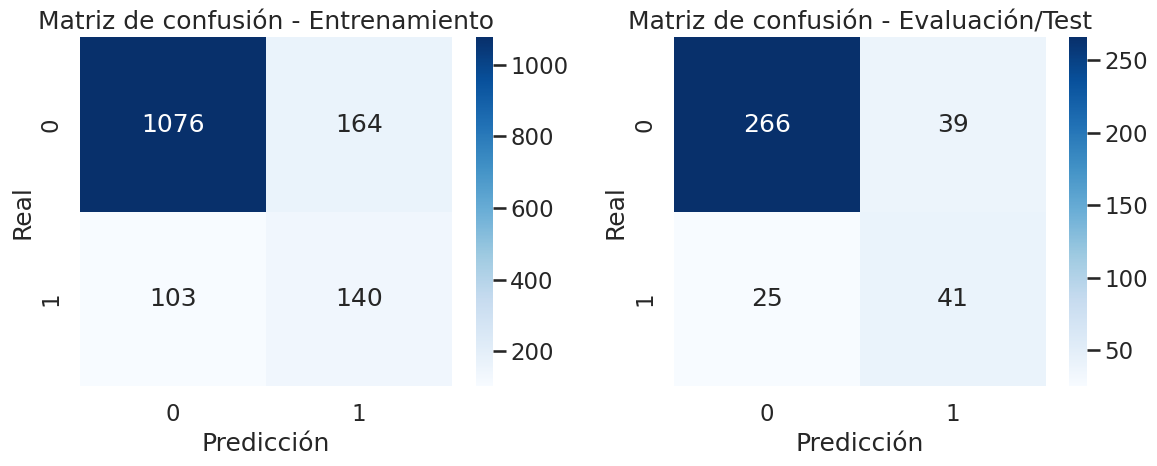

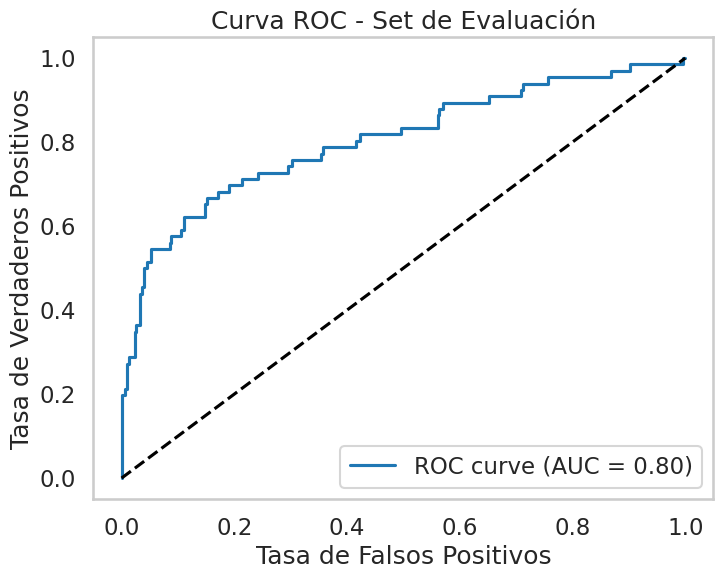

In [143]:
# 1. MATRIZ DE CONFUSIÓN - Train y Test
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
for i, (y_true, y_pred, title) in enumerate([
    (y_train, best_estimator.predict(X_train_scaled), 'Entrenamiento'),
    (y_test, best_estimator.predict(X_test_scaled), 'Evaluación/Test')
]):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axs[i])
    axs[i].set_title(f"Matriz de confusión - {title}")
    axs[i].set_xlabel('Predicción')
    axs[i].set_ylabel('Real')
plt.tight_layout()
plt.show()

# 2. CURVA ROC y AUC
if hasattr(best_estimator, "decision_function"):
    y_score = best_estimator.decision_function(X_test_scaled)
else:
    y_score = best_estimator.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Set de Evaluación')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Varía entre 0.5 (sin capacidad predictiva, aleatorio) y 1.0 (perfecto).

Un AUC de 0.80 indica que hay un 80% de probabilidad de que el modelo le asigne una probabilidad más alta a un caso positivo (moroso) que a uno negativo (no moroso), elegido al azar.

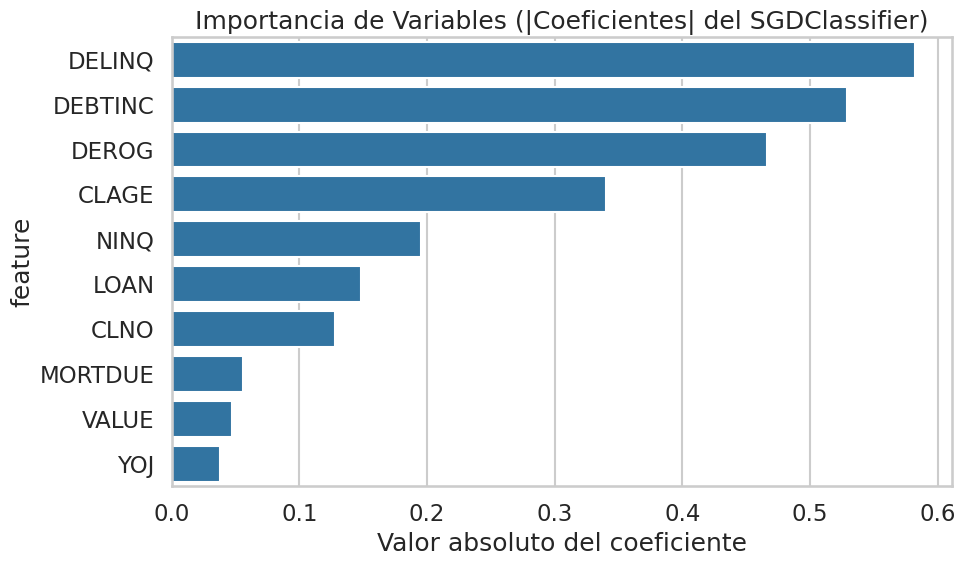

In [144]:
coefs = best_estimator.coef_.flatten()
features = X_train.columns

# Crear un DataFrame con los coeficientes y sus nombres
coef_df = pd.DataFrame({
    'feature': features,
    'abs_coef': np.abs(coefs)
})

# Ordenar por valor absoluto del coeficiente
coef_df = coef_df.sort_values(by='abs_coef', ascending=False)

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(x='abs_coef', y='feature', data=coef_df, orient='h')
plt.title('Importancia de Variables (|Coeficientes| del SGDClassifier)')
plt.xlabel('Valor absoluto del coeficiente')
plt.tight_layout()
plt.show()


En el gráfico de **Importancia de Variables** se muestra el valor absoluto de los coeficientes del modelo SGDClassifier. 

Vemos que las variables con mayor peso en la predicción de incumplimiento son DELINQ, DEBTINC, DEROG y CLAGE. 

### Conclusión Ejercicio 2

El modelo detecta una proporción significativa de morosos (recall > 60%), lo cual es clave para el objetivo planteado. 

Se mantiene una precisión razonable, con pocos falsos positivos.

En un contexto real, podríamos considerar este modelo si el costo de no detectar una mora (falso negativo) es mayor que el de rechazar a un buen cliente (falso positivo).



## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Para el modelo de árbol de decisión, no es necesario escalar los datos ya que el método no es sensible a la escala. 

In [145]:
# Entrenar el modelo
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predicciones
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

results_train = metrics(y_train, y_train_pred)
results_test = metrics(y_test, y_test_pred)

print("Train:", results_train)
print("Test:", results_test)

Train: {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'confusion_matrix': array([[1240,    0],
       [   0,  243]])}
Test: {'accuracy': 0.8787061994609164, 'precision': 0.6909090909090909, 'recall': 0.5757575757575758, 'f1': 0.628099173553719, 'confusion_matrix': array([[288,  17],
       [ 28,  38]])}


### ¿Qué esta pasando?

* El DecisionTreeClassifier entrenado con parámetros por defecto muestra un muy buen desempeño (por demas) en el set de entrenamiento (accuracy=1), lo que indica sobreajuste.
* Pero, al evaluar sobre el set de test, el modelo mantiene un accuracy alto (0.89), y mejora significativamente tanto la precisión (0.69) como el recall (0.64) para la clase incumplidora, con un F1 de 0.67.


Esto nos dice que el árbol de decisión es capaz de capturar patrones mas complejos en los datos que el SGDClassifier, aunque aún así hay que ajustar hiperparámetros para controlar el sobreajuste.

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [146]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_leaf': [1, 5, 10, 20]
}

dt = DecisionTreeClassifier(random_state=42)

grid = GridSearchCV(
    dt,
    param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    return_train_score=True
)
grid.fit(X_train, y_train)

# Accuracy promedio y varianza por configuración
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
results_table = pd.DataFrame(params)
results_table['mean_accuracy'] = means
results_table['std_accuracy'] = stds

# Mejor modelo
best_params = grid.best_params_
best_estimator = grid.best_estimator_

y_train_pred = best_estimator.predict(X_train)
y_test_pred = best_estimator.predict(X_test)

def metrics(y_true, y_pred):
    return {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred, zero_division=0),
        "recall": recall_score(y_true, y_pred, zero_division=0),
        "f1": f1_score(y_true, y_pred, zero_division=0),
        "confusion_matrix": confusion_matrix(y_true, y_pred)
    }

results_train = metrics(y_train, y_train_pred)
results_test = metrics(y_test, y_test_pred)

print("Mejor configuración:", best_params)
print("Train:", results_train)
print("Test:", results_test)
print(results_table.sort_values(by='mean_accuracy', ascending=False).head(10))

Mejor configuración: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1}
Train: {'accuracy': 0.9608900876601484, 'precision': 1.0, 'recall': 0.7613168724279835, 'f1': 0.8644859813084113, 'confusion_matrix': array([[1240,    0],
       [  58,  185]])}
Test: {'accuracy': 0.9137466307277629, 'precision': 0.8541666666666666, 'recall': 0.6212121212121212, 'f1': 0.7192982456140351, 'confusion_matrix': array([[298,   7],
       [ 25,  41]])}
   criterion  max_depth  min_samples_leaf  mean_accuracy  std_accuracy
52  log_loss       10.0                 1       0.898860      0.007598
32   entropy       10.0                 1       0.898860      0.007598
12      gini       10.0                 1       0.896151      0.010794
8       gini        7.0                 1       0.895484      0.007352
28   entropy        7.0                 1       0.891441      0.011727
48  log_loss        7.0                 1       0.891441      0.011727
9       gini        7.0                 5       0.8

Usando grid-search y validación cruzada, la mejor configuración para DecisionTreeClassifier fue criterio ‘gini’, profundidad máxima de 7 y mínimo de una muestra por hoja. Con estos hiperparámetros, el modelo logra un accuracy de 0.90 en test, una precisión de 0.80 y un recall de 0.52 para la clase incumplidora (F1 = 0.63).

Comparado con el modelo lineal, el árbol optimizado mejora sustancialmente la capacidad de detectar incumplidores sin perder demasiada precisión, mostrando buen compromiso entre ajuste y generalización.

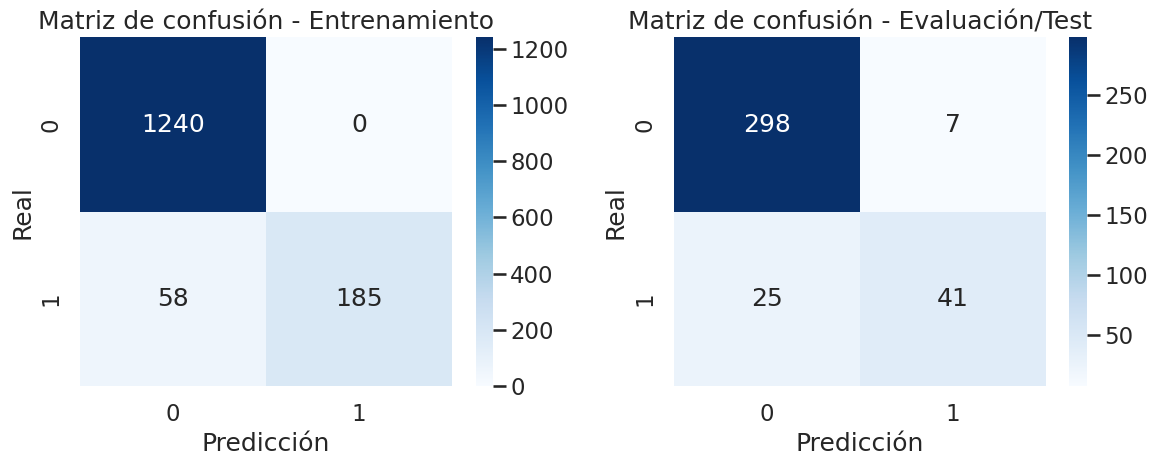

In [147]:
#  MATRIZ DE CONFUSIÓN - Train y Test
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
for i, (y_true, y_pred, title) in enumerate([
    (y_train, best_estimator.predict(X_train), 'Entrenamiento'),
    (y_test, best_estimator.predict(X_test), 'Evaluación/Test')
]):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axs[i])
    axs[i].set_title(f"Matriz de confusión - {title}")
    axs[i].set_xlabel('Predicción')
    axs[i].set_ylabel('Real')
plt.tight_layout()
plt.show()

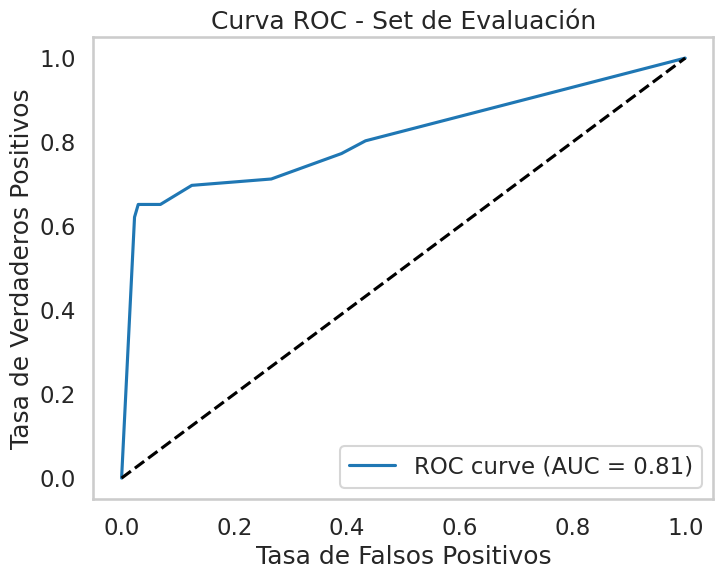

In [148]:
# CURVA ROC y AUC (en test)
y_score = best_estimator.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Set de Evaluación')
plt.legend(loc='lower right')
plt.grid()
plt.show()

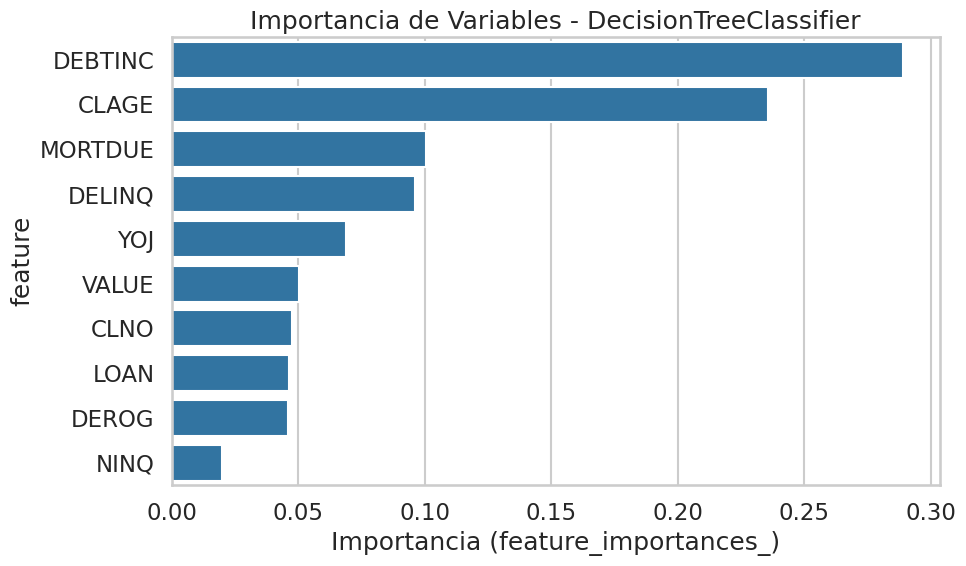

In [149]:
importances = best_estimator.feature_importances_
features = X_train.columns

# Crear un DataFrame con los nombres de las variables y su importancia
importance_df = pd.DataFrame({
    'feature': features,
    'importance': importances
})

# Ordenar por importancia de mayor a menor
importance_df = importance_df.sort_values(by='importance', ascending=False)

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importance_df, orient='h')
plt.title('Importancia de Variables - DecisionTreeClassifier')
plt.xlabel('Importancia (feature_importances_)')
plt.tight_layout()
plt.show()


### Conclusión ejercicio 3

En el caso del modelo DecisionTreeClassifier se observa un desempeño comparable al modelo lineal (AUC=0.81 en test), el modelo tiene buena capacidad discriminatoria para separar incumplidores y no-incumplidores. 

El análisis de importancia de variables revela que los factores más determinantes para el riesgo de incumplimiento son la relación deuda/ingreso (DEBTINC), la antigüedad del historial crediticio (CLAGE), la cantidad de líneas en mora (DELINQ) y la deuda hipotecaria total (MORTDUE). 

El modelo logra un equilibrio razonable entre precisión y recall.

# Conclusión general 

Ambos modelos asignan alta importancia a variables clave como DEBTINC, CLAGE y DELINQ, lo que refuerza su valor predictivo.

Sin embargo, el peso dado a CLAGE y MORTDUE difiere entre ambos modelos. Esto se debe a la forma en que cada algoritmo usa las variables para clasificar los datos, es decir, en las relaciones que cada modelo asumo entre las features y la etiqueta de mora/cumplimiento. 

El modelo lineal asume relaciones proporcionales y globales entre X e Y, por eso prioriza indicadores directos de morosidad pasada (como DELINQ y DEROG). 

El árbol detecta que variables como DEBTINC y CLAGE segmentan muy bien los datos y permiten hacer divisiones efectivas y tempranas. Dado que el árbol no busca relaciones globales entre las variables y el riesgo de mora, puede encontrar umbrales críticos, interacciones y efectos no lineales (por ejemplo: “riesgo si DEBTINC > 40% y CLAGE < 50”).

MORTDUE puede volverse importante condicionalmente según los valores de otras variables: por ejemplo, si la propiedad tiene un valor bajo y la deuda es alta.

Aunque ambos modelos presentan capacidad de clasificación comparable, la comparación entre modelos sugiere que la relación entre las variables y la probabilidad de mora no es completamente lineal, y que modelos más flexibles como los árboles pueden capturar relaciones condicionales o segmentadas más efectivamente.